In [1]:
from workflow.fasttree_marker_analysis.gunc_d_analyse_decorated import FastTreeMarkerAnalyseDecorated

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DF = FastTreeMarkerAnalyseDecorated(target_pct=50, congruence=100).output().read_cached()
print(len(DF))
DF.head()

4525


,gid,congruence,target_pct,pct_removed,classification,tax_result,markers_lost,markers_gained
0,GCA_000153745.1,100,50,2.842647,run_on,correct,"('',)","('TIGR00158;TIGR00166',)"
1,GCA_000166735.2,100,50,30.555357,run_on,correct,"('TIGR00061',)","('',)"
2,GCA_000318405.1,100,50,50.216168,run_on,correct,('TIGR01017;TIGR00468;TIGR01087;TIGR00194;TIGR...,"('',)"
3,GCA_000371845.1,100,50,50.767984,run_on,correct,('TIGR01032;TIGR01082;TIGR00095;TIGR00168;TIGR...,"('TIGR00083',)"
4,GCA_000372785.1,100,50,53.213276,run_on,correct,('TIGR01017;TIGR00059;TIGR01087;TIGR01128;TIGR...,"('TIGR00431;TIGR00088;TIGR02013;TIGR00082',)"


,gid,congruence,target_pct,pct_removed,classification,tax_result,markers_lost,markers_gained


In [30]:
def generate_data():

    rows = list()

    for row in DF.itertuples():
        if row.classification == 'run_on':
            if row.tax_result == 'correct':
                rows.append({
                    'gid': row.gid,
                    'pct_removed': row.pct_removed,
                    'group': 'congruent'
                })
            elif row.tax_result == 'check':
              rows.append({
                        'gid': row.gid,
                        'pct_removed': row.pct_removed,
                        'group': 'incongruent'
                    })
            else:
                print(row)
                raise Exception('?')
            print()
        elif row.classification == 'same_msa':
                rows.append({
                'gid': row.gid,
                'pct_removed': row.pct_removed,
                'group': 'congruent'
            })
        elif row.classification == 'no_markers':
                 rows.append({
                'gid': row.gid,
                'pct_removed': row.pct_removed,
                'group': 'incongruent'
            })
        else:
            print(row)
            raise Exception('?')
    return pd.DataFrame(rows)

PLOT_DATA = generate_data()
PLOT_DATA.head()

,gid,pct_removed,group
0,GCA_000153745.1,2.842647,congruent
1,GCA_000166735.2,30.555357,congruent
2,GCA_000318405.1,50.216168,congruent
3,GCA_000371845.1,50.767984,congruent
4,GCA_000372785.1,53.213276,congruent


<AxesSubplot:title={'center':'Actual % of genome removed for congruent genomes'}, xlabel='pct_removed', ylabel='Percent'>

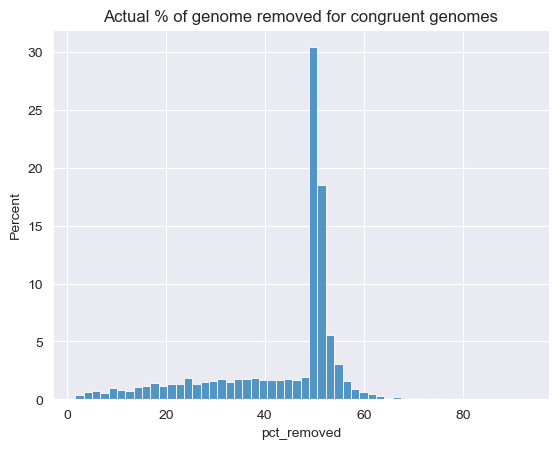

In [31]:
# print(len(PLOT_DATA[PLOT_DATA['group'] == 'congruent']))

plt.title('Actual % of genome removed for congruent genomes')
sns.histplot(data=PLOT_DATA[PLOT_DATA['group'] == 'congruent'], x='pct_removed', stat='percent')